Here we analyse the S&P 500 moving average crossover.

The rule for this strategy is to BUY when the price crosses above the MA and sell when it crosses below the MA.

In this analysis we used libraries such as:

1. `yfinance`
2. `numpy`
3. `datetime`
4. `matplotlib.pyplot`


In [2]:
# import libraries
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Variables

Here we create variables that are used in the analysis further down.

`SYMBOL` - Symbol is the ticker we want to follow. In this scenario we are looking at S&P 500 with the ticker ^GSPC

`PERIOD` - The Moving Average line can be set to various time periods such as 50, 100 and 200 days. In this analysis we are using the 200-day period

`STARTING_BALANCE` - To calculate the performance of this strategy, we set starting balance of 10,000 to calculate the return of portfolio over time

In [3]:
# define variables
SYMBOL = "^GSPC"
PERIOD = 200
STARTING_BALANCE = 10000

# Time Period

In this analysis we are looking at a 24 year period. Starting 1/1/2000 until 1/1/2024

Below we also define `DAYS` and `YEARS`. Each year is calculated as 365.25 days to make up for the leap year

The pricing data is collected from Yahoo Finance and inserted into the `price` data frame to be used for analysis

In [4]:
# define time period
START = datetime.datetime(2000, 1, 1)
END = datetime.datetime(2024, 1, 1)
DAYS = END - START
YEARS = DAYS.days / 365.25

In [5]:
price = yf.download(SYMBOL, start=START, end=END)

price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


In [6]:
# drop the columns that are not needed in our dataframe
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], axis = 1)

price.head()

,Open,Close
Date,,
2000-01-03,1469.250000,1455.219971
2000-01-04,1455.219971,1399.420044
2000-01-05,1399.420044,1402.109985
2000-01-06,1402.109985,1403.449951
2000-01-07,1403.449951,1441.469971


After we have removed the unwanted columns from out data frame, we use the `Close` column to plot a chart based on the closing price of the index over the 24 year period.

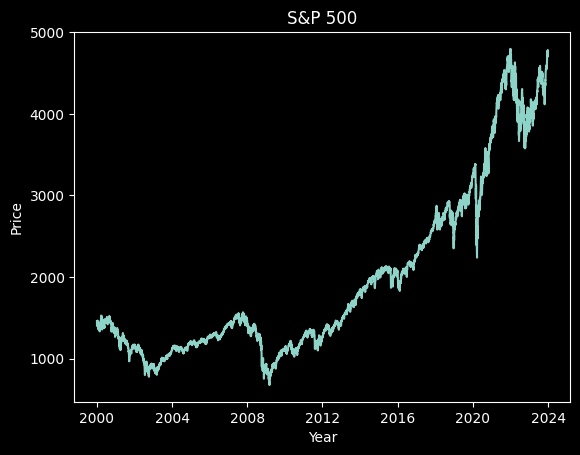

In [7]:
# plot chart
plt.style.use('dark_background')
plt.plot(price.Close)

plt.title('S&P 500')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

## Calculate Daily Returns, Balance and Simple Moving Average (SMA)

- **Daily Return**: Calculated as the ratio of today's close to the previous day's close.

- **Buy-and-Hold Balance**: Tracks the cumulative investment growth, assuming an initial balance (`STARTING_BALANCE`) reinvested daily.

- **SMA**: Computes the moving average of the closing price over a specified period (`PERIOD`). This helps smooth out price data for trend analysis.

The final table displays the last few rows with daily returns, the cumulative balance and the SMA values.


In [8]:
# calculate daily return for close/close and close/open
price['Return'] = price.Close / price.Close.shift(1)

# calculate buy and hold balance
price['Bench_Bal'] = price.Return.cumprod() * STARTING_BALANCE

# calculate the moving average
price['SMA'] = price.Close.rolling(window = PERIOD).mean()

price.tail()

,Open,Close,Return,Bench_Bal,SMA
Date,,,,,
2023-12-22,4753.919922,4754.629883,1.001660,32672.929032,4335.861046
2023-12-26,4758.859863,4774.750000,1.004232,32811.190721,4340.426846
2023-12-27,4773.450195,4781.580078,1.001430,32858.125743,4345.055946
2023-12-28,4786.439941,4783.350098,1.000370,32870.288987,4349.376246
2023-12-29,4782.879883,4769.830078,0.997174,32777.381936,4353.765747


## Plot Closing Price with Moving Average

- **Chart**: Plots the closing price with the moving average overlaid in red.
- **Purpose**: Visualise trends in price data with the moving average, making it easier to identify upward or downward trends.

The x-axis shows the year, while the y-axis represents the price.


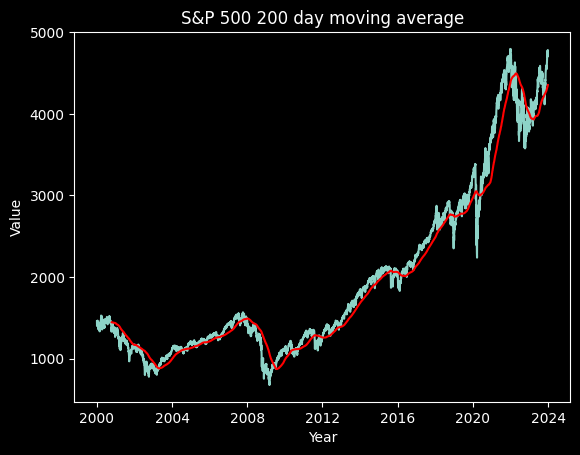

In [9]:
# plot chart with moving average overlaid
plt.plot(price.Close)
plt.plot(price.SMA, color="red")

plt.title('S&P 500 200 day moving average')
plt.xlabel('Year')
plt.ylabel('Value')

plt.show()

## Calculate System Returns Based on Moving Average Signal

- **Position Holding**: Holds a position when the closing price is above the 200-day moving average (`Long`). This is a binary field showing True / False based on the condition set.
- **System Return**: Calculates daily returns only when in the market (open-to-open); on other days, returns are set to 1.
- **System Balance**: Tracks cumulative balance based on the system's returns, starting from the initial balance (`STARTING_BALANCE`).

The final table shows the last few rows, including the `Long` positions, system returns, and cumulative balance.


In [10]:
# Hold a position for every day the close is above the 200 MA
price['Long'] = price.Close > price.SMA

# calculate the daily return from Open to Open on days in the market
# on days when there is no trade, return = 1
price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)

# calculate system balance
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Return.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal,SMA,Long,Sys_Return,Sys_Bal
Date,,,,,,,,
2023-12-22,4753.919922,4754.629883,1.001660,32672.929032,4335.861046,True,1.001660,28322.213782
2023-12-26,4758.859863,4774.750000,1.004232,32811.190721,4340.426846,True,1.004232,28442.064596
2023-12-27,4773.450195,4781.580078,1.001430,32858.125743,4345.055946,True,1.001430,28482.749768
2023-12-28,4786.439941,4783.350098,1.000370,32870.288987,4349.376246,True,1.000370,28493.293359
2023-12-29,4782.879883,4769.830078,0.997174,32777.381936,4353.765747,True,0.997174,28412.757777


## Plot System Balance vs. Benchmark Balance

- **Chart**: Compares the cumulative balance of the buy-and-hold strategy (`Bench_Bal`) with the system strategy (`Sys_Bal`), shown in red.
- **Purpose**: Visualises the performance of the system strategy against the benchmark over time.

The x-axis represents the year, and the y-axis shows the balance.


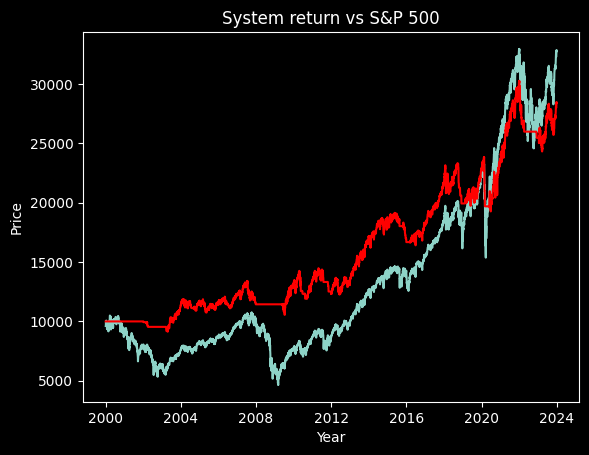

In [11]:
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal, color="red")

plt.title('System return vs S&P 500')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

## Calculate Drawdown for Benchmark and System

- **Drawdown Calculation**:

  - **Benchmark**: Tracks peak values of the benchmark balance (`Bench_Peak`) and calculates drawdown as the difference between the balance and its peak.
    
  - **System**: Similarly, tracks the system's peak (`Sys_Peak`) and calculates drawdown.

- **Drawdown Metrics**: The minimum drawdown percentage for the benchmark (`bench_dd`) and the maximum drawdown for the system (`sys_dd`) are summarised for comparison.


In [12]:
# calculate drawdown
# benchmark
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

# system
price['Sys_Peak'] = price['Sys_Bal'].cummax()

price['Sys_DD'] = price['Sys_Peak'] - price['Sys_Bal']

sys_dd = round(((price.Sys_DD / price.Sys_Peak).max()) * -100, 2)

## Calculate Performance Metrics

- **Metrics Calculation**:
  - **Total Return**: Calculates the overall percentage return for both the benchmark and system strategies.
  - **CAGR (Compound Annual Growth Rate)**: Computes the annual growth rate over the specified period for both strategies.
  - **Drawdown**: Displays the previously calculated drawdown for both strategies.
  - **Time in the market**: Calculates the percentage of time the system was in the market based on the number of days it held a position.

The metrics are printed for comparison between the benchmark and system performance.


In [13]:
# calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1])**(1/YEARS))-1)*100),2)
sys_return = round(((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0]) - 1) *100, 2)
sys_cagr = round(((((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0])**(1/YEARS))-1)*100), 2)
sys_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')

Benchmark Total return: 240.84%
Benchmark CAGR: 5.24
Benchmark DD: -56.78%

System Total return: 184.13%
System CAGR: 4.45
System DD: -21.31%
System Time in the Market: 67.12%


## Backtest Function

The `backtest` function evaluates a trading strategy based on a moving average:

- **Inputs**:

  - `price`: DataFrame containing stock price data.
    
  - `period`: The window for calculating the simple moving average (SMA).

- **Calculations**:

  - **SMA**: Computes the moving average of the closing price over the specified period.
    
  - **Position Holding**: Indicates when the closing price is above the SMA.
    
  - **System Return**: Calculates returns based on positions held; returns are set to 1 when not in the market.
    
  - **System Balance**: Tracks the cumulative balance using the calculated returns.

- **Output**: Returns the Compound Annual Growth Rate (CAGR) for the system strategy.


In [14]:
def backtest(price, period):
    #calculate moving average
    price['SMA'] = price.Close.rolling(window = period).mean()
    
    #Hold a position for every day the close is above the MA
    price['Long'] = price.Close > price.SMA
    
    #on days when there is no trade, return is 1
    price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)
    
    #calculate balance
    price['Sys_Balance'] = STARTING_BALANCE * price.Sys_Return.cumprod()
    
    cagr_system = (((price.Sys_Balance.iloc[-1]/price.Sys_Balance.iloc[0])**(1/YEARS))-1)*100
    
    return cagr_system

## Backtesting Multiple Periods

- **Periods Generation**: Creates a list of periods ranging from 20 to 250, incremented by 2, for testing different moving average windows.
  
- **CAGR Calculation**: Loops through each period, calls the `backtest` function, and stores the resulting Compound Annual Growth Rate (CAGR) for each period in a list.


- **Plotting Results**: Displays a graph of CAGR against the moving average periods to visualise the performance of the strategy across different periods.


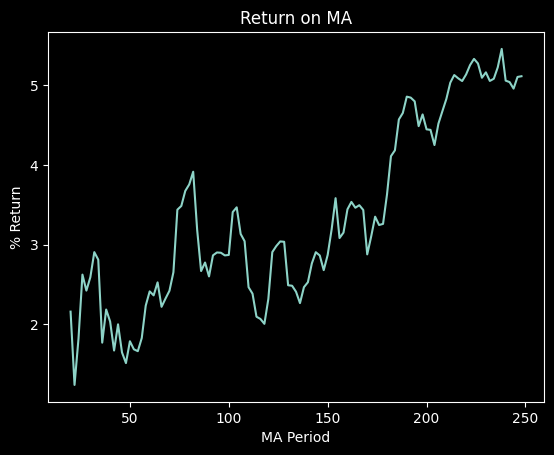

In [15]:
periods = []
periods.extend(range(20, 250, 2))
cagr = []

for period in periods:
    result = backtest(price, period)
    cagr.append(result)

plt.title('Return on MA')
plt.xlabel('MA Period')
plt.ylabel('% Return')

plt.plot(periods, cagr)
plt.show()

In [16]:
optimal_value = periods[cagr.index(max(cagr))]

optimal_value

238

## Conclusion

The analysis indicates that using a moving average strategy with periods of 200 days or more often yields the best returns compared to shorter moving averages. However, despite these findings, the overall results demonstrate that this moving average strategy does not consistently outperform a buy-and-hold approach in the market.

While the strategy shows potential for managing risk and timing entries, the buy-and-hold strategy remains superior in terms of total return over the analysed period. This suggests that investors may still benefit more from a long-term investment approach rather than relying solely on tactical trading based on moving averages.